这个例子展示使用seq label数据的处理过程。  0.8.0的torchtext

另外：https://www.jianshu.com/p/e5adb235399e

In [1]:
from torchtext import data
from torchtext import datasets
import torch
from torchtext.data import Field
from torchtext.data import TabularDataset
from torchtext.data import Iterator, BucketIterator

### 例子

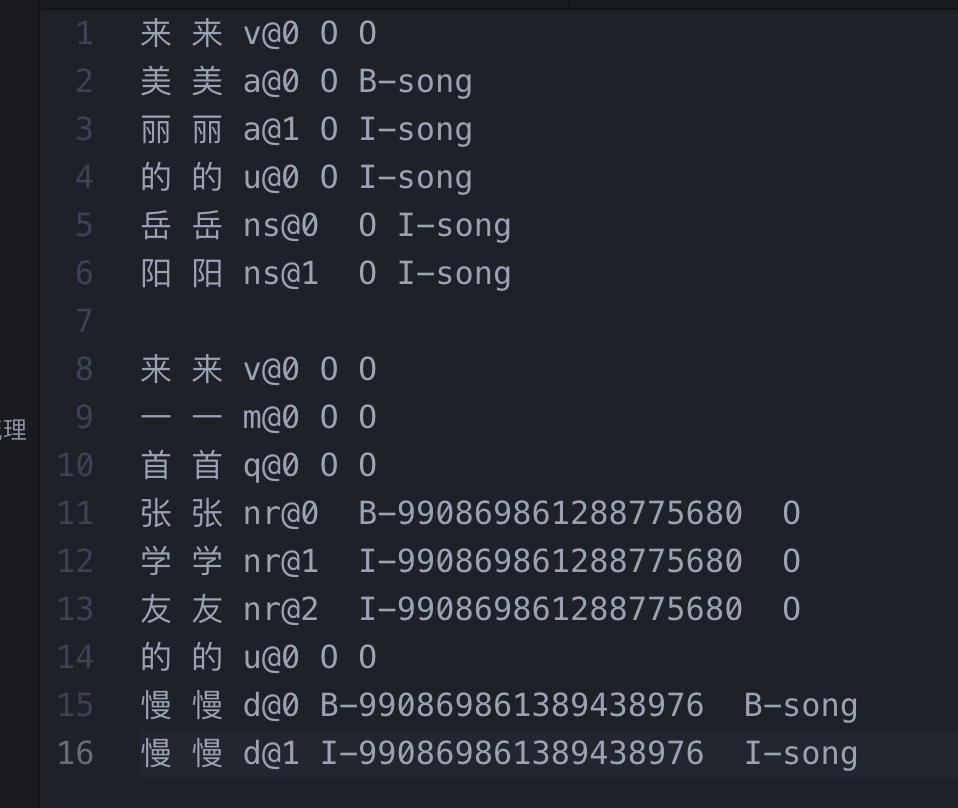

In [2]:
from IPython.display import Image
Image(filename='./images/seq_data.png')
# tab分割

In [3]:
WORD = data.Field(batch_first=True)
ENTITY = data.Field(batch_first=True)
TAG = data.Field(batch_first=True)

# Load the specified data.
train = datasets.SequenceTaggingDataset(
    fields=[('word', WORD), (None, None), (None, None), ('entity', ENTITY), ('tag', TAG)],
    path="./data/seq.txt")

print(train[0])
print(train[1])

# 这里可以添加外部词向量
WORD.build_vocab(train.word)
ENTITY.build_vocab(train.entity)
TAG.build_vocab(train.tag)

print(len(WORD.vocab))
print(len(ENTITY.vocab))
print(len(TAG.vocab))

train_iter = data.BucketIterator(train, batch_size=6, device='cpu')
batch = next(iter(train_iter))
print("words", batch.word)
print("entity", batch.entity)
print("tag", batch.tag)

#构造与tag相对应mask tensor
# for batch in iter(train_iter):
#     i = i + 1
#     sentences, entity, tags = batch.word, batch.entity, batch.tag
#     batch_size = len(sentences)
#     max_seq_len = len(sentences[0])
#     mask_tensor = autograd.Variable(torch.zeros((batch_size, max_seq_len))).byte()
#     for idx, tag in enumerate(tags):
#         # print(tag)
#         res = [1 if item != 1 else 0 for item in tag]
#         # print(res)
#         mask_tensor[idx, :max_seq_len] = torch.FloatTensor(res)

30
7
7
words tensor([[ 3, 15,  5, 28,  2,  7, 22,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1],
        [ 2, 17, 13, 14,  9, 23, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1],
        [ 3,  8,  4, 25, 21, 24, 18, 10, 29, 27, 20,  6,  2,  4,  5, 19, 26, 11,
         16]])
entity tensor([[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [6, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2]])
tag tensor([[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 5, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 6, 4, 4, 4, 4, 4, 4]])


/Users/wangming/anaconda3/lib/python3.6/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/wangming/anaconda3/lib/python3.6/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/Users/wangming/anaconda3/lib/python3.6/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired in the 0.8.0 release and moved 